SIMULACIÓN CON DIFERENCIACIÓN ACTIVADA

🔥 DIFERENCIACIÓN: ACTIVADA

Configuración:
  - Total de escenarios: 140
  - Tamaño de lote: 20
  - Archivo de salida: resultados_arima_CON_diferenciacion.xlsx


Ejecutando 140 escenarios en 7 lotes.

LOTE 1/7 (Escenarios 1-20)
    Sublote 1/4


      Escenarios: 100%|██████████| 5/5 [46:07<00:00, 553.42s/it]


    Sublote 2/4


      Escenarios: 100%|██████████| 5/5 [45:02<00:00, 540.54s/it]


    Sublote 3/4


      Escenarios: 100%|██████████| 5/5 [46:10<00:00, 554.11s/it]


    Sublote 4/4


      Escenarios: 100%|██████████| 5/5 [44:32<00:00, 534.59s/it]


  Limpiando memoria del lote...

LOTE 2/7 (Escenarios 21-40)
    Sublote 1/4


      Escenarios: 100%|██████████| 5/5 [49:26<00:00, 593.34s/it]


    Sublote 2/4


      Escenarios: 100%|██████████| 5/5 [41:07<00:00, 493.53s/it]


    Sublote 3/4


      Escenarios: 100%|██████████| 5/5 [44:51<00:00, 538.21s/it]


    Sublote 4/4


      Escenarios: 100%|██████████| 5/5 [40:54<00:00, 490.99s/it]


  Limpiando memoria del lote...

LOTE 3/7 (Escenarios 41-60)
    Sublote 1/4


      Escenarios: 100%|██████████| 5/5 [43:12<00:00, 518.50s/it]


    Sublote 2/4


      Escenarios: 100%|██████████| 5/5 [45:03<00:00, 540.67s/it]


    Sublote 3/4


      Escenarios: 100%|██████████| 5/5 [38:56<00:00, 467.22s/it]


    Sublote 4/4


      Escenarios: 100%|██████████| 5/5 [37:01<00:00, 444.29s/it]


  Limpiando memoria del lote...
  ✅ Checkpoint guardado: checkpoint_lote_3.xlsx

LOTE 4/7 (Escenarios 61-80)
    Sublote 1/4


      Escenarios: 100%|██████████| 5/5 [40:39<00:00, 488.00s/it]


    Sublote 2/4


      Escenarios: 100%|██████████| 5/5 [38:34<00:00, 462.95s/it]


    Sublote 3/4


      Escenarios: 100%|██████████| 5/5 [42:28<00:00, 509.64s/it]


    Sublote 4/4


      Escenarios: 100%|██████████| 5/5 [42:45<00:00, 513.04s/it]


  Limpiando memoria del lote...

LOTE 5/7 (Escenarios 81-100)
    Sublote 1/4


      Escenarios: 100%|██████████| 5/5 [42:44<00:00, 512.83s/it]


    Sublote 2/4


      Escenarios: 100%|██████████| 5/5 [41:15<00:00, 495.13s/it]


    Sublote 3/4


      Escenarios: 100%|██████████| 5/5 [38:34<00:00, 462.98s/it]


    Sublote 4/4


      Escenarios: 100%|██████████| 5/5 [44:32<00:00, 534.49s/it]


  Limpiando memoria del lote...

LOTE 6/7 (Escenarios 101-120)
    Sublote 1/4


      Escenarios: 100%|██████████| 5/5 [47:58<00:00, 575.72s/it]


    Sublote 2/4


      Escenarios: 100%|██████████| 5/5 [38:01<00:00, 456.21s/it]


    Sublote 3/4


      Escenarios: 100%|██████████| 5/5 [45:49<00:00, 549.95s/it]


    Sublote 4/4


      Escenarios: 100%|██████████| 5/5 [41:14<00:00, 494.98s/it]


  Limpiando memoria del lote...
  ✅ Checkpoint guardado: checkpoint_lote_6.xlsx

LOTE 7/7 (Escenarios 121-140)
    Sublote 1/4


      Escenarios: 100%|██████████| 5/5 [36:03<00:00, 432.69s/it]


    Sublote 2/4


      Escenarios: 100%|██████████| 5/5 [34:22<00:00, 412.57s/it]


    Sublote 3/4


      Escenarios: 100%|██████████| 5/5 [36:37<00:00, 439.53s/it]


    Sublote 4/4


      Escenarios: 100%|██████████| 5/5 [40:26<00:00, 485.34s/it]


  Limpiando memoria del lote...
✅ 840 filas de resultados guardadas en 'resultados_arima_CON_diferenciacion.xlsx'


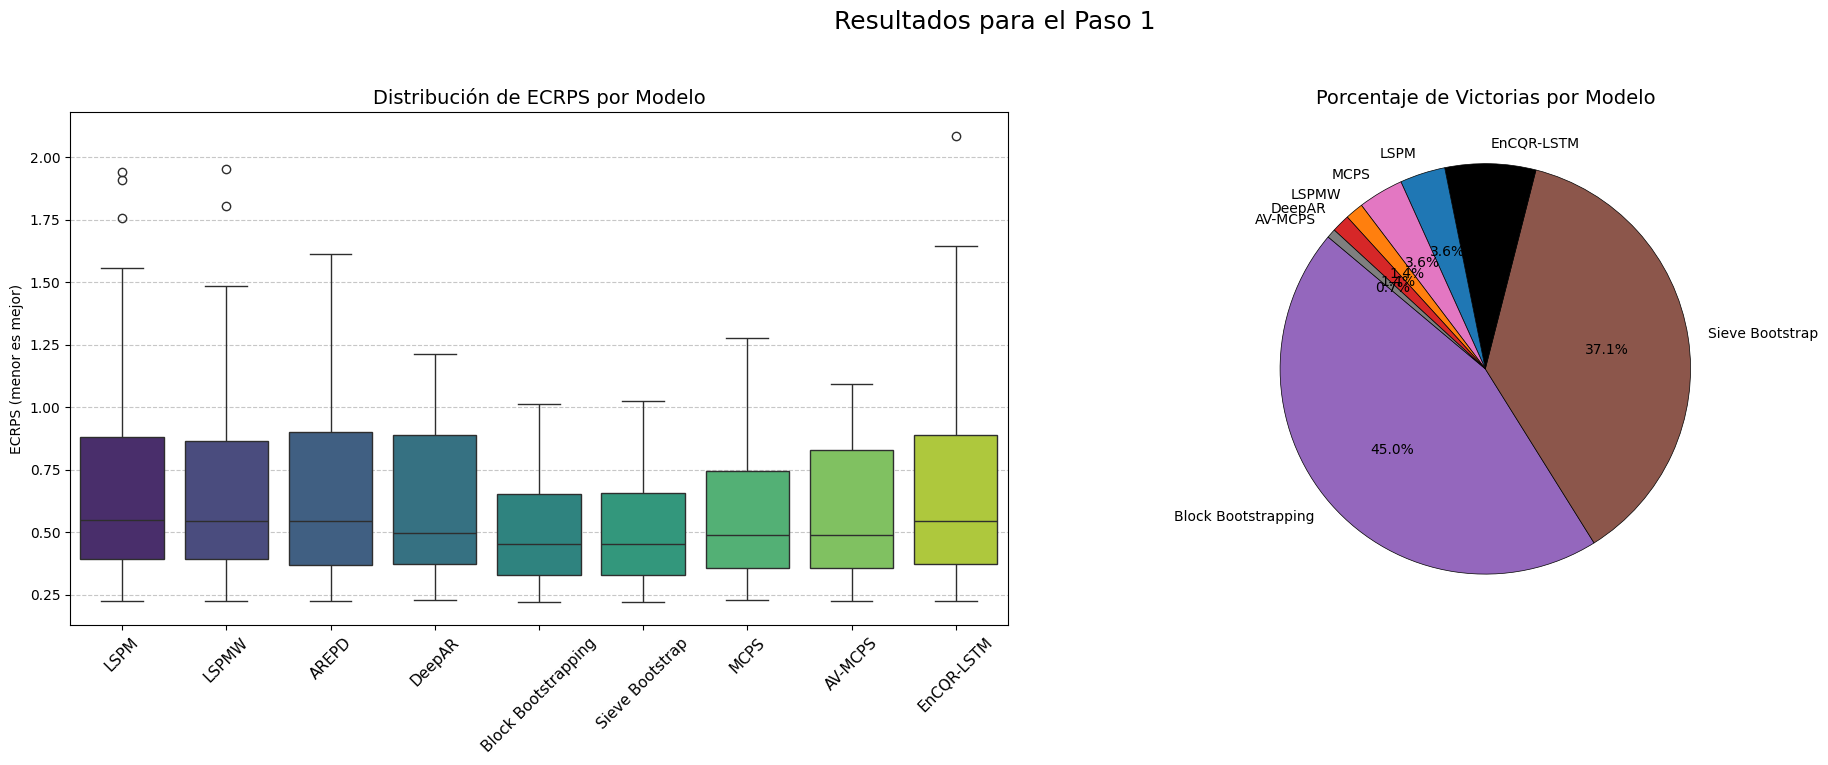

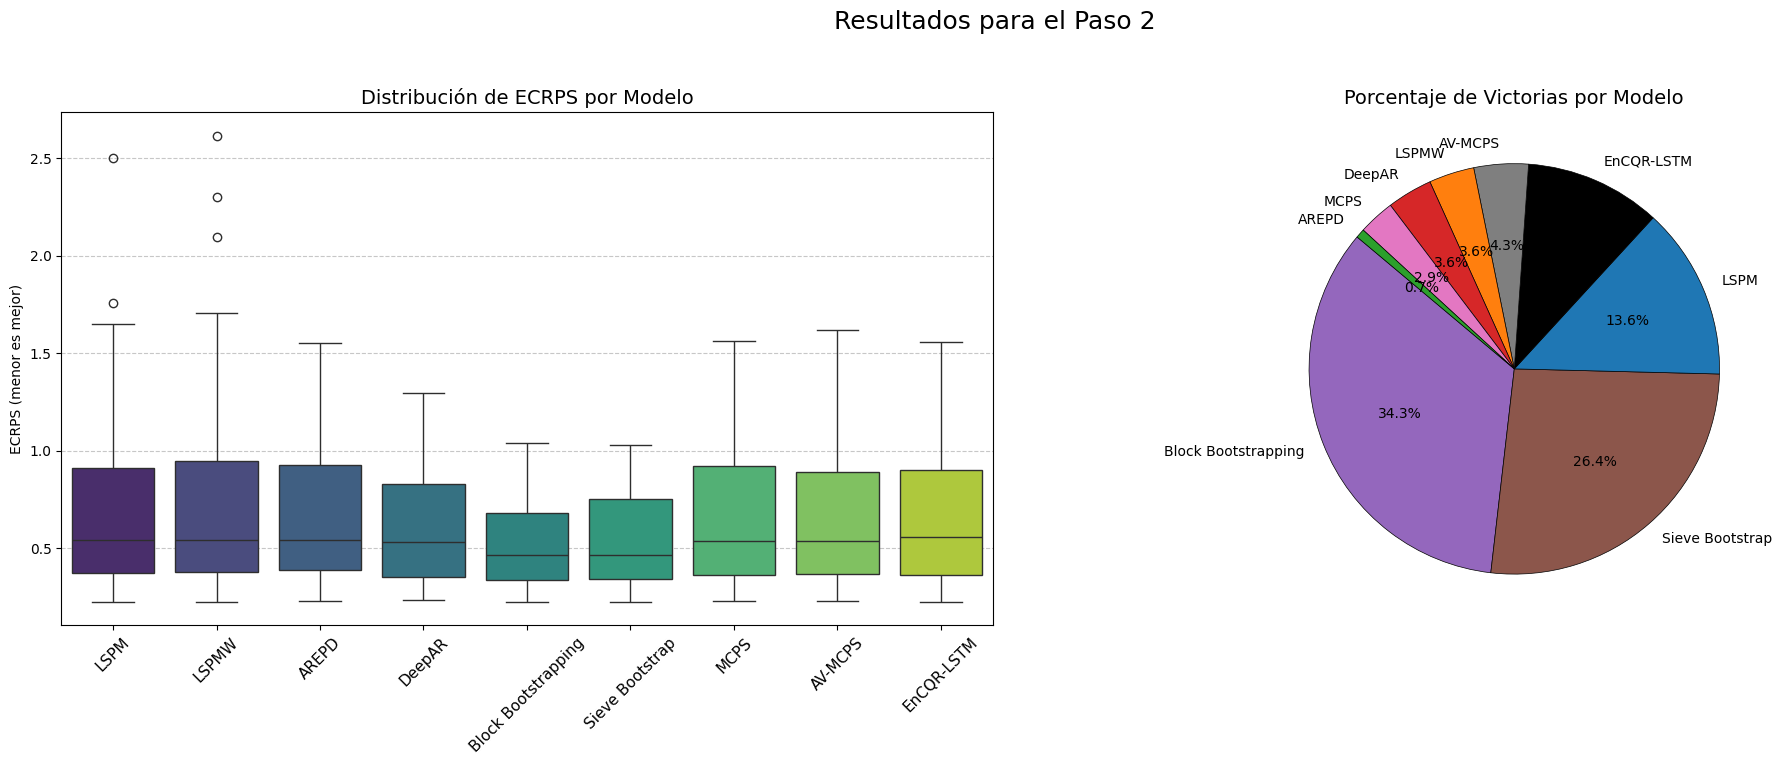

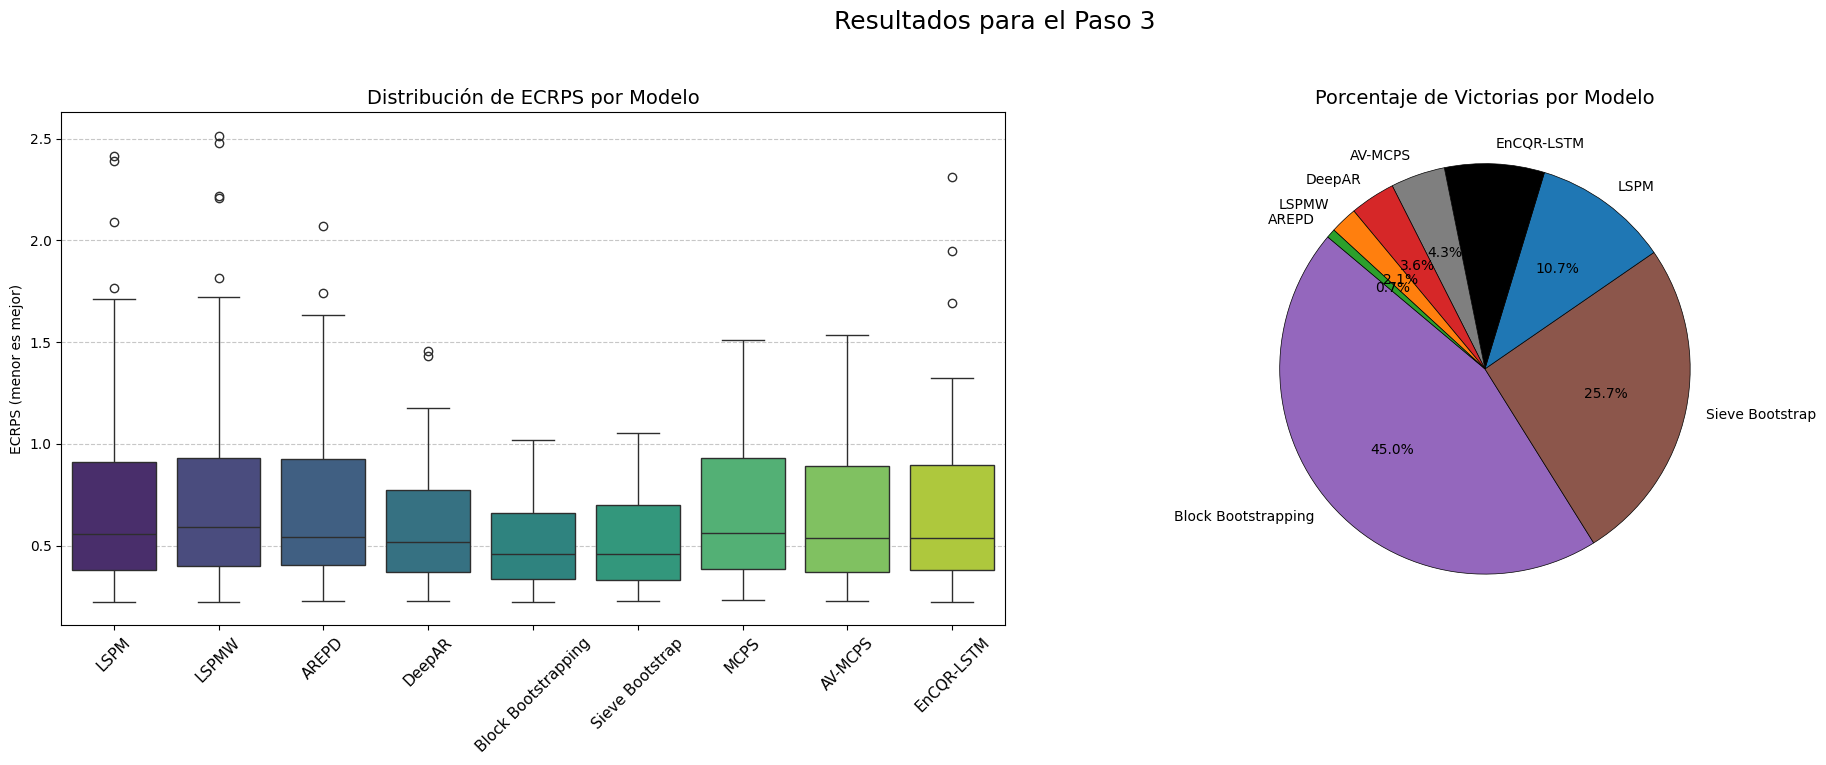

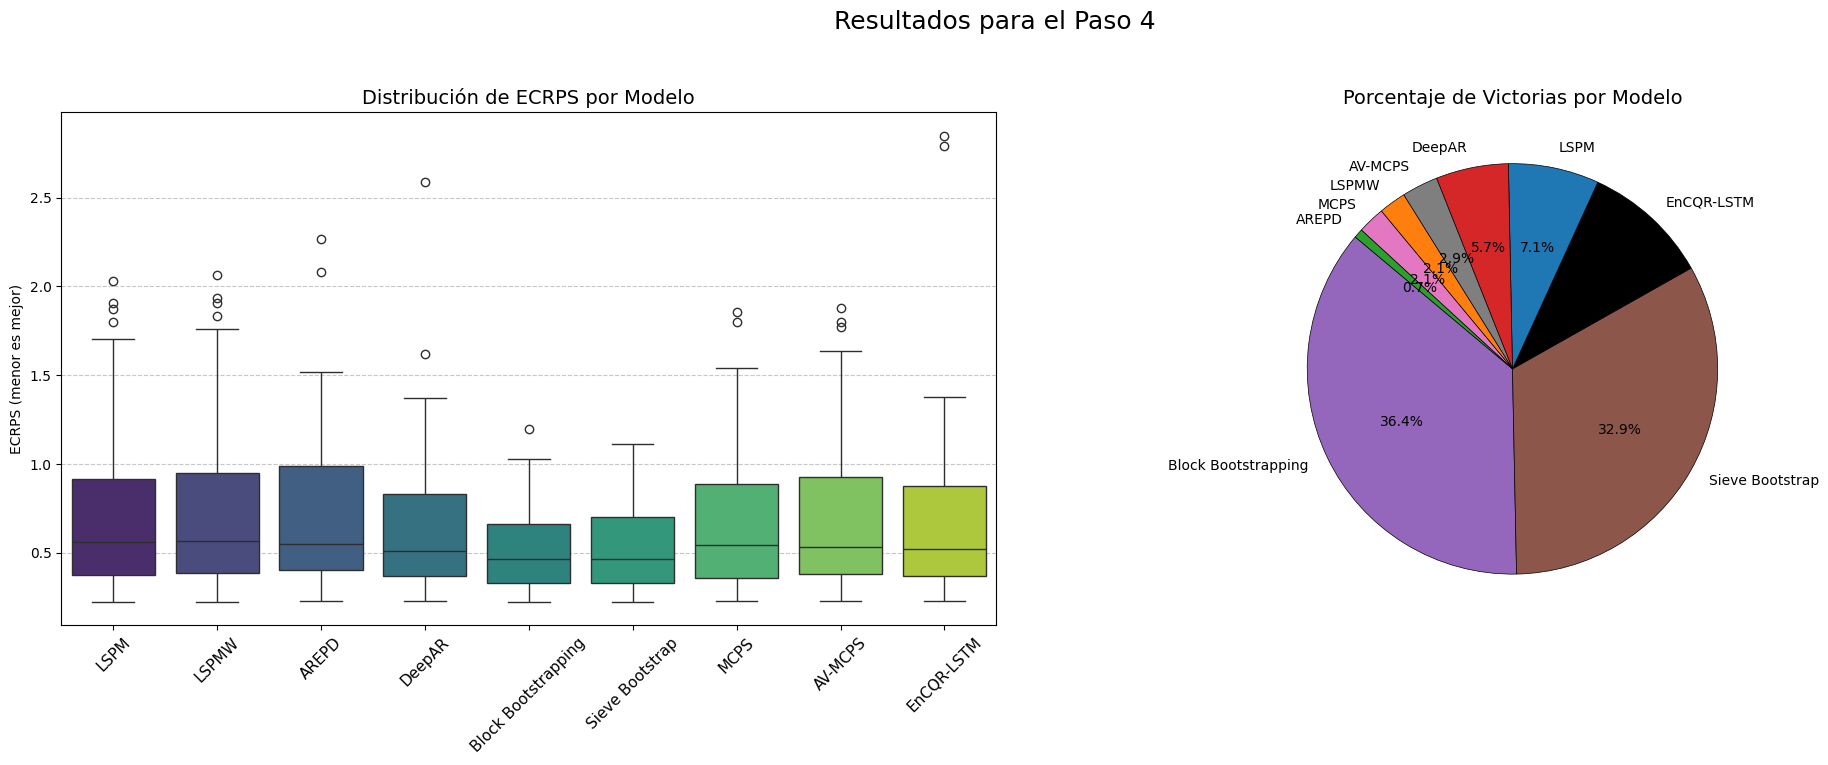

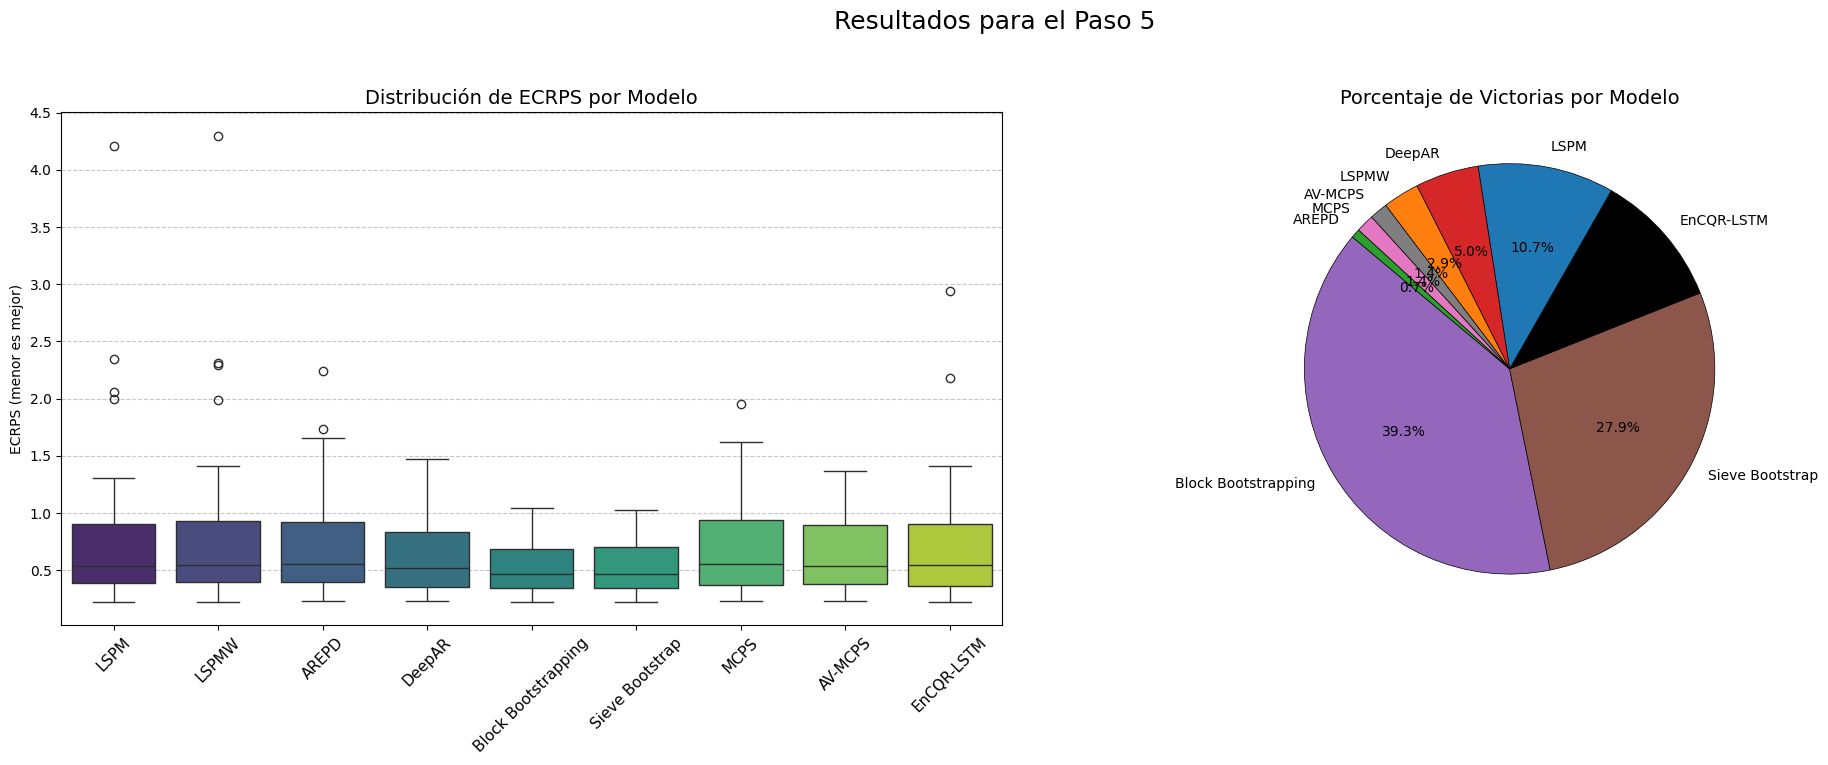

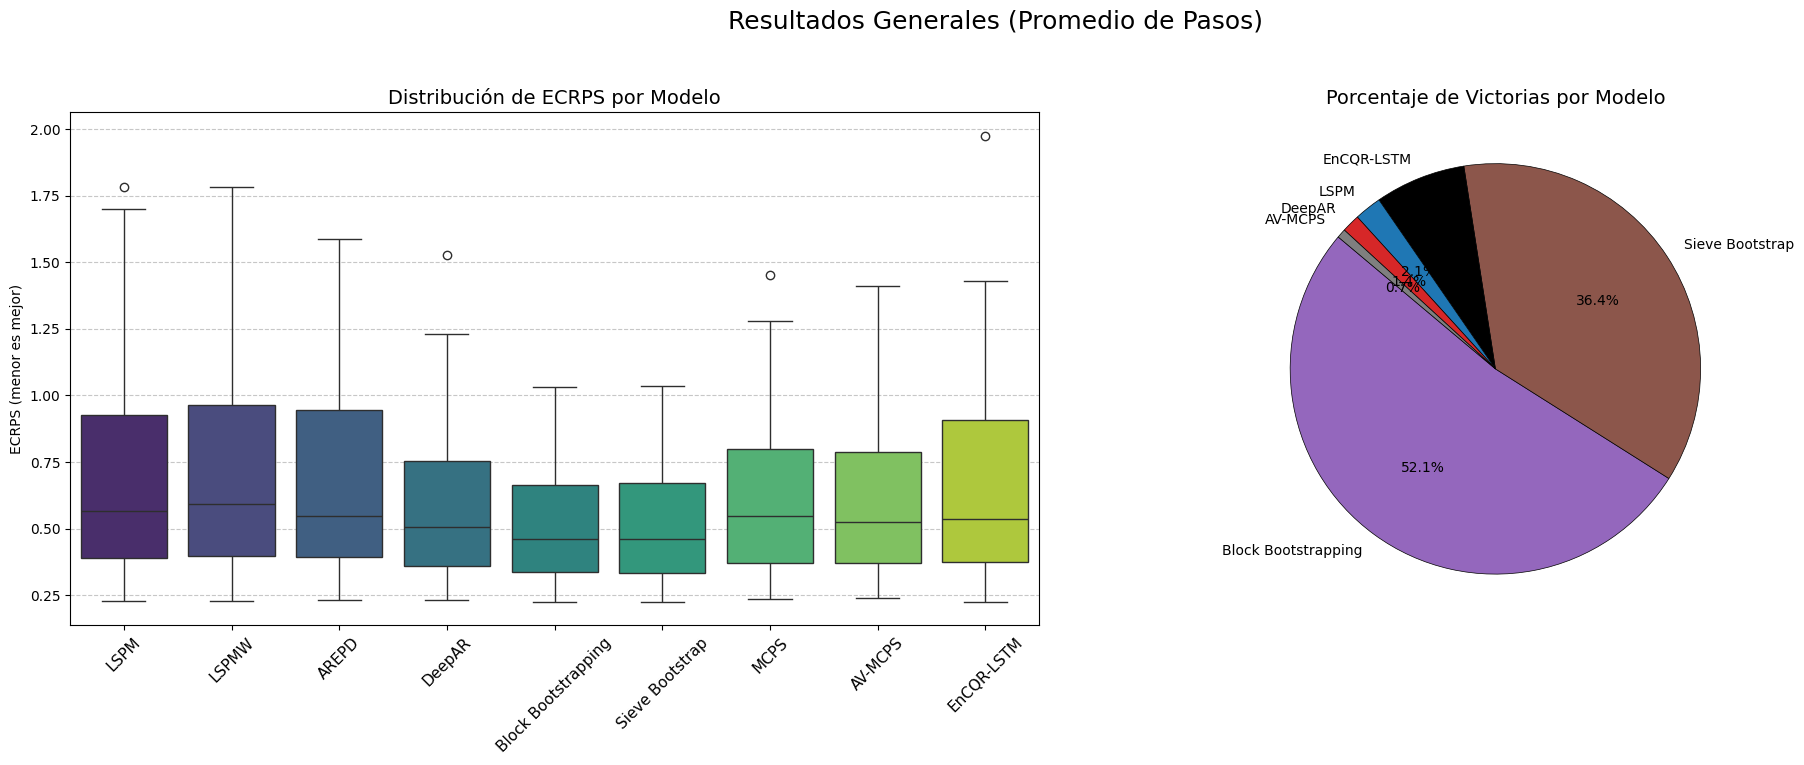


✅ SIMULACIÓN CON DIFERENCIACIÓN COMPLETADA

🧹 Limpieza completada.


In [2]:
# run_simulation_CON_diferenciacion.py
import warnings
import os
import numpy as np
from typing import List, Dict
from pipeline import ScenarioRunnerMejorado, clear_all_sessions

# Configuración inicial
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

class ScenarioRunnerConDiferenciacion(ScenarioRunnerMejorado):
    """
    Versión del runner que GARANTIZA el uso de diferenciación.
    """
    
    def _generate_scenarios(self, n_scenarios: int) -> List[Dict]:
        """
        Genera escenarios CON diferenciación activada explícitamente.
        """
        scenarios = []
        
        all_possible_scenarios = []
        for model in self.models_config:
            for dist in self.distributions:
                for var in self.variances:
                    all_possible_scenarios.append({
                        **model, 
                        'noise_dist': dist, 
                        'sigma': np.sqrt(var)
                    })

        num_to_generate = min(n_scenarios, len(all_possible_scenarios))
        final_scenarios = all_possible_scenarios[:num_to_generate]
        
        # ✅ CAMBIO CLAVE: Agregar 'usar_diferenciacion': True
        return [
            {
                'config': {**sc, 'scenario_id': i + 1}, 
                'seed': self.seed + i,
                'usar_diferenciacion': True  # 🔥 ACTIVAR DIFERENCIACIÓN
            } 
            for i, sc in enumerate(final_scenarios)
        ]

def main():
    print("="*80)
    print("SIMULACIÓN CON DIFERENCIACIÓN ACTIVADA")
    print("="*80)
    
    # Usar la versión corregida del runner
    runner = ScenarioRunnerConDiferenciacion(seed=420)
    
    config = {
        'n_scenarios': 140,
        'excel_filename': 'resultados_arima_CON_diferenciacion.xlsx',
        'batch_size': 20,
        'restart_every': 5,
        'plot': False  # Cambiar a True para ver gráficos con "[CON DIFERENCIACIÓN]"
    }
    
    print(f"\n🔥 DIFERENCIACIÓN: ACTIVADA")
    print(f"\nConfiguración:")
    print(f"  - Total de escenarios: {config['n_scenarios']}")
    print(f"  - Tamaño de lote: {config['batch_size']}")
    print(f"  - Archivo de salida: {config['excel_filename']}")
    print("\n" + "="*80 + "\n")
    
    try:
        runner.run(**config)
        
        print("\n" + "="*80)
        print("✅ SIMULACIÓN CON DIFERENCIACIÓN COMPLETADA")
        print("="*80)
        
    except KeyboardInterrupt:
        print("\n\n⚠️ Simulación interrumpida.")
        
    except Exception as e:
        print(f"\n\n❌ Error: {e}")
        import traceback
        traceback.print_exc()
        
    finally:
        clear_all_sessions()
        print("\n🧹 Limpieza completada.")

if __name__ == "__main__":
    main()


🚀 EJECUTANDO 140 ESCENARIOS ARIMA
📊 Modelos: MCPS y AV-MCPS únicamente
🔧 Modo: CON diferenciación
📦 7 lotes de máximo 20 escenarios


LOTE 1/7 (Escenarios 1-20)
    Sublote 1/4


      Escenarios: 100%|██████████| 5/5 [02:46<00:00, 33.27s/it]


    Sublote 2/4


      Escenarios: 100%|██████████| 5/5 [02:41<00:00, 32.24s/it]


    Sublote 3/4


      Escenarios: 100%|██████████| 5/5 [02:42<00:00, 32.54s/it]


    Sublote 4/4


      Escenarios: 100%|██████████| 5/5 [02:54<00:00, 34.82s/it]


  🧹 Limpiando memoria del lote...

LOTE 2/7 (Escenarios 21-40)
    Sublote 1/4


      Escenarios: 100%|██████████| 5/5 [02:46<00:00, 33.23s/it]


    Sublote 2/4


      Escenarios: 100%|██████████| 5/5 [02:25<00:00, 29.06s/it]


    Sublote 3/4


      Escenarios: 100%|██████████| 5/5 [02:15<00:00, 27.08s/it]


    Sublote 4/4


      Escenarios: 100%|██████████| 5/5 [02:30<00:00, 30.10s/it]


  🧹 Limpiando memoria del lote...

LOTE 3/7 (Escenarios 41-60)
    Sublote 1/4


      Escenarios: 100%|██████████| 5/5 [02:50<00:00, 34.00s/it]


    Sublote 2/4


      Escenarios: 100%|██████████| 5/5 [02:16<00:00, 27.21s/it]


    Sublote 3/4


      Escenarios: 100%|██████████| 5/5 [02:21<00:00, 28.22s/it]


    Sublote 4/4


      Escenarios: 100%|██████████| 5/5 [02:13<00:00, 26.69s/it]


  🧹 Limpiando memoria del lote...
  💾 Checkpoint guardado: checkpoint_mcps_arima_batch_3.xlsx

LOTE 4/7 (Escenarios 61-80)
    Sublote 1/4


      Escenarios: 100%|██████████| 5/5 [02:14<00:00, 26.89s/it]


    Sublote 2/4


      Escenarios: 100%|██████████| 5/5 [02:16<00:00, 27.39s/it]


    Sublote 3/4


      Escenarios: 100%|██████████| 5/5 [02:34<00:00, 30.94s/it]


    Sublote 4/4


      Escenarios: 100%|██████████| 5/5 [02:33<00:00, 30.64s/it]


  🧹 Limpiando memoria del lote...

LOTE 5/7 (Escenarios 81-100)
    Sublote 1/4


      Escenarios: 100%|██████████| 5/5 [02:17<00:00, 27.47s/it]


    Sublote 2/4


      Escenarios: 100%|██████████| 5/5 [02:10<00:00, 26.17s/it]


    Sublote 3/4


      Escenarios: 100%|██████████| 5/5 [02:12<00:00, 26.43s/it]


    Sublote 4/4


      Escenarios: 100%|██████████| 5/5 [02:16<00:00, 27.29s/it]


  🧹 Limpiando memoria del lote...

LOTE 6/7 (Escenarios 101-120)
    Sublote 1/4


      Escenarios: 100%|██████████| 5/5 [02:26<00:00, 29.36s/it]


    Sublote 2/4


      Escenarios: 100%|██████████| 5/5 [02:20<00:00, 28.18s/it]


    Sublote 3/4


      Escenarios: 100%|██████████| 5/5 [02:21<00:00, 28.33s/it]


    Sublote 4/4


      Escenarios: 100%|██████████| 5/5 [02:18<00:00, 27.79s/it]


  🧹 Limpiando memoria del lote...
  💾 Checkpoint guardado: checkpoint_mcps_arima_batch_6.xlsx

LOTE 7/7 (Escenarios 121-140)
    Sublote 1/4


      Escenarios: 100%|██████████| 5/5 [02:32<00:00, 30.53s/it]


    Sublote 2/4


      Escenarios: 100%|██████████| 5/5 [02:32<00:00, 30.47s/it]


    Sublote 3/4


      Escenarios: 100%|██████████| 5/5 [02:23<00:00, 28.78s/it]


    Sublote 4/4


      Escenarios: 100%|██████████| 5/5 [02:14<00:00, 26.88s/it]


  🧹 Limpiando memoria del lote...

✅ 840 resultados guardados en 'resultados_mcps_vs_av-mcps_arima.xlsx'


c:\Users\pleal\Documents\Unal\Tesis\Codigo\Prediccion_Probabilistica\codigo_final\final\prediccion_a_un_paso\lineal_no_estacionario_diferencial\pipeline.py:2681: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


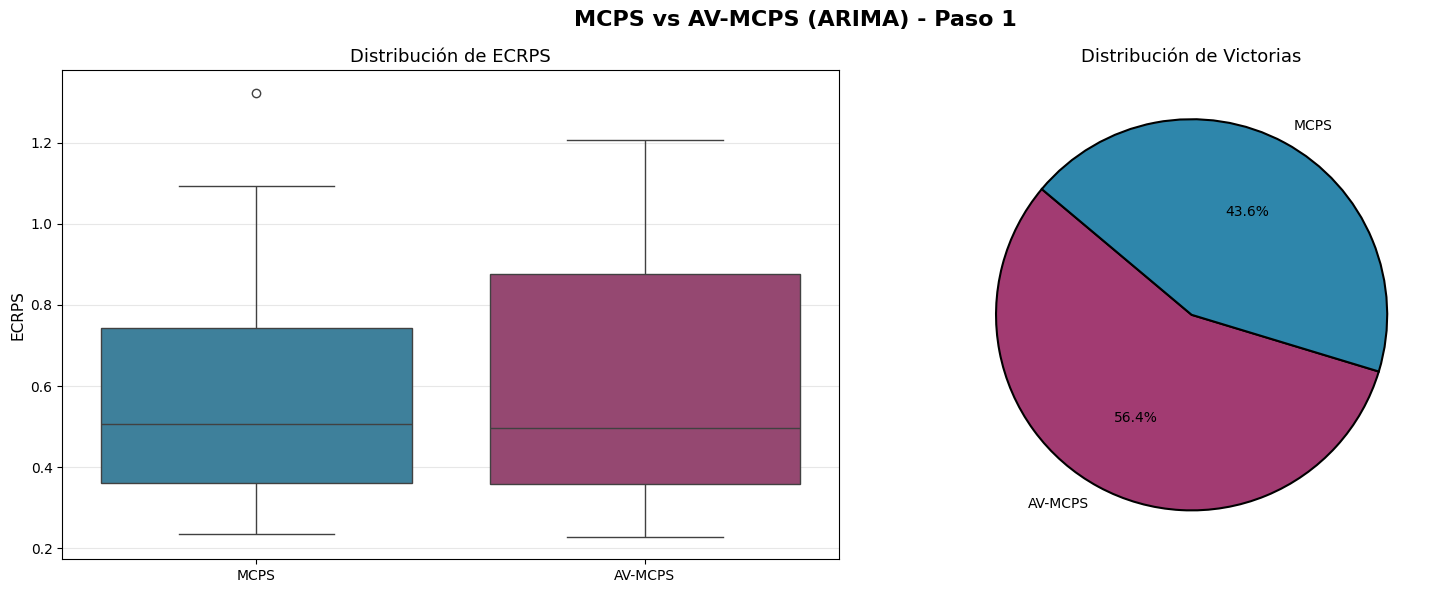

c:\Users\pleal\Documents\Unal\Tesis\Codigo\Prediccion_Probabilistica\codigo_final\final\prediccion_a_un_paso\lineal_no_estacionario_diferencial\pipeline.py:2681: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


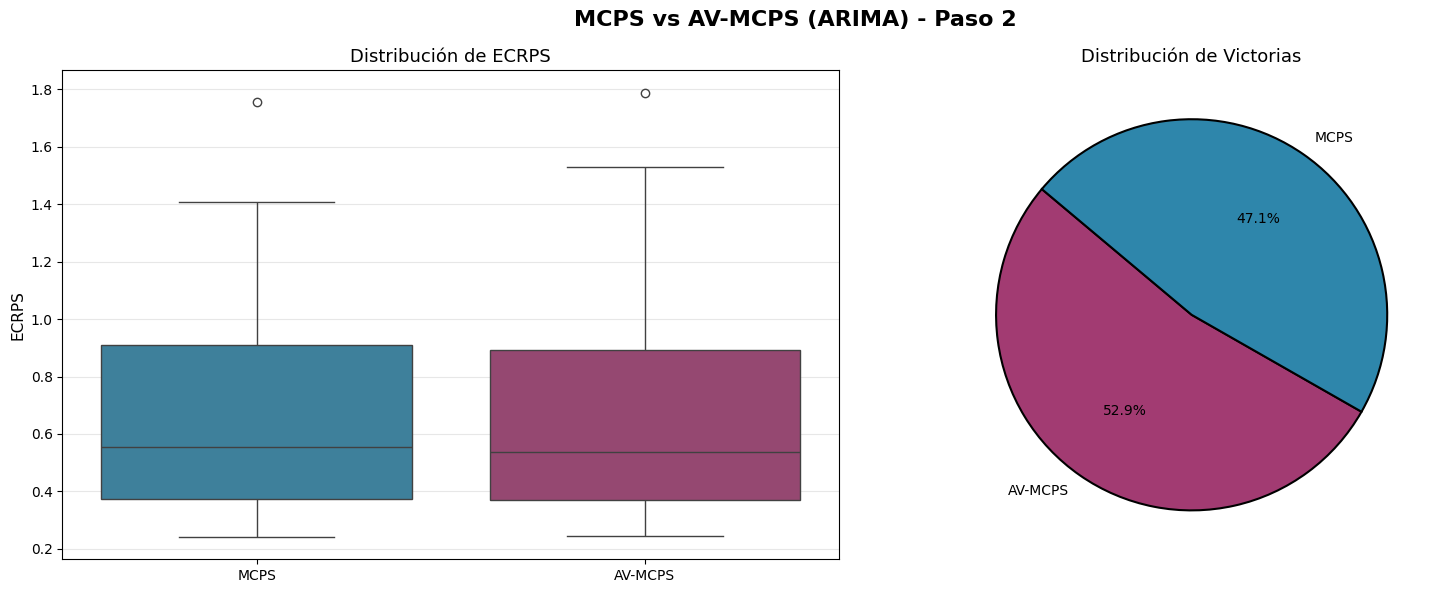

c:\Users\pleal\Documents\Unal\Tesis\Codigo\Prediccion_Probabilistica\codigo_final\final\prediccion_a_un_paso\lineal_no_estacionario_diferencial\pipeline.py:2681: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


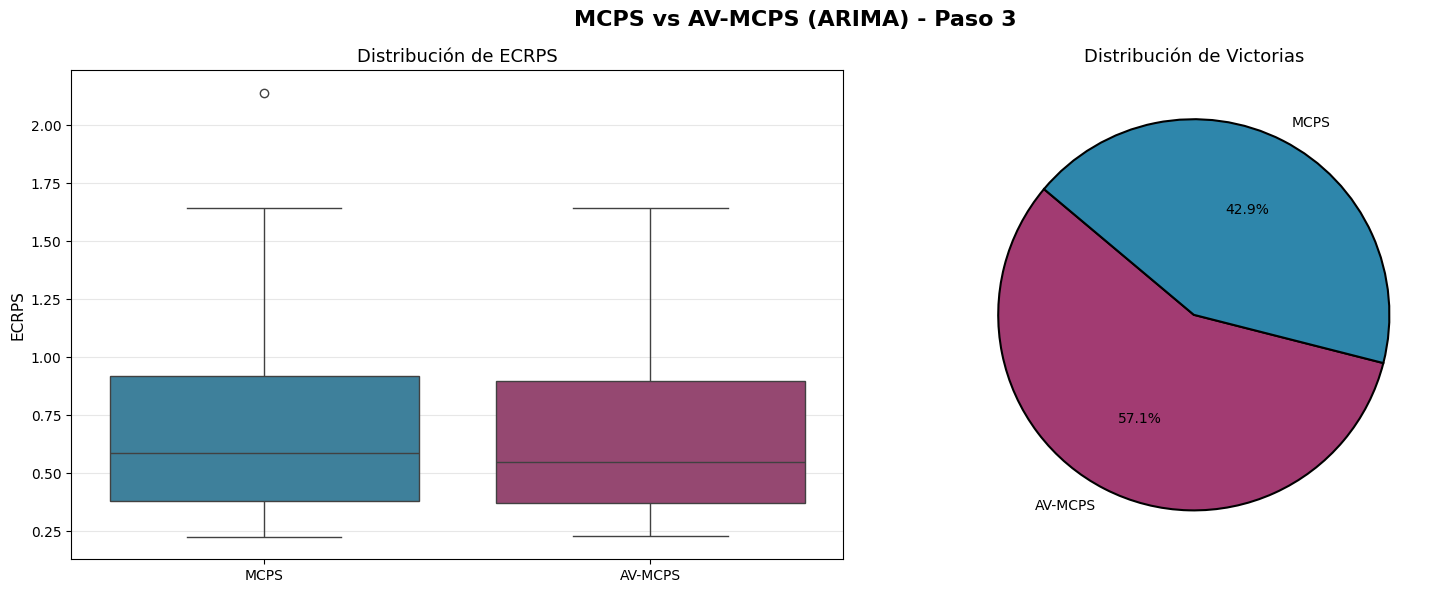

c:\Users\pleal\Documents\Unal\Tesis\Codigo\Prediccion_Probabilistica\codigo_final\final\prediccion_a_un_paso\lineal_no_estacionario_diferencial\pipeline.py:2681: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


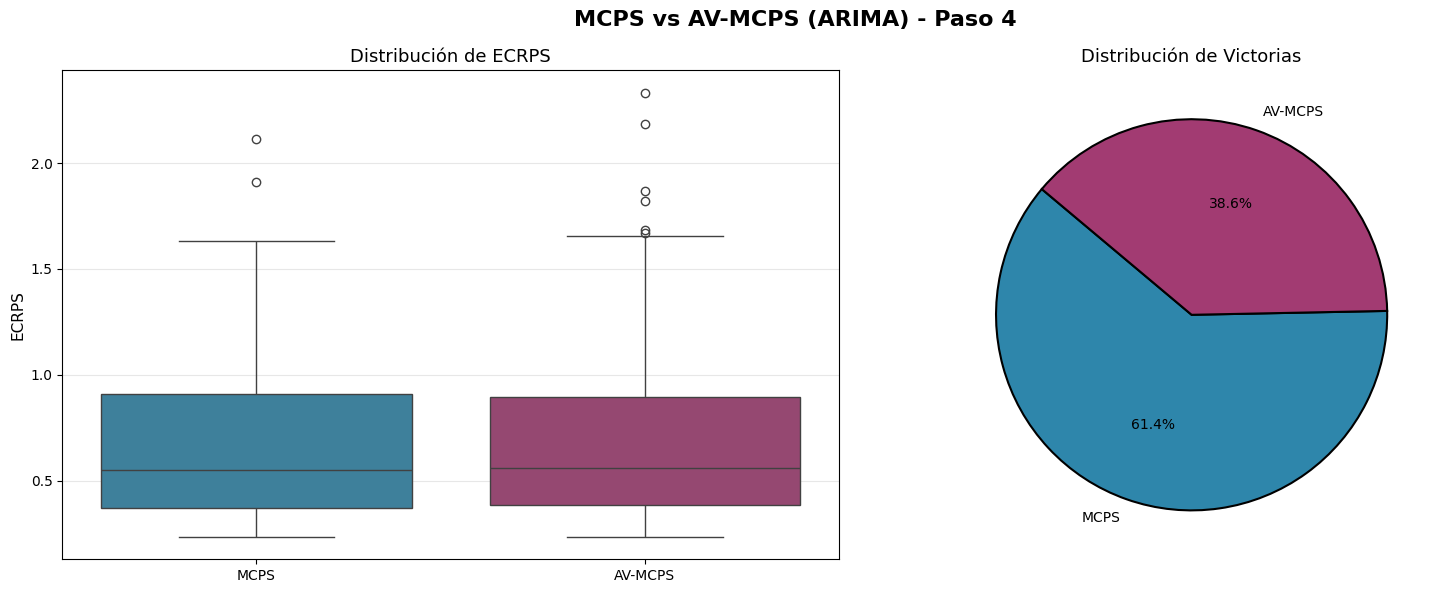

c:\Users\pleal\Documents\Unal\Tesis\Codigo\Prediccion_Probabilistica\codigo_final\final\prediccion_a_un_paso\lineal_no_estacionario_diferencial\pipeline.py:2681: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


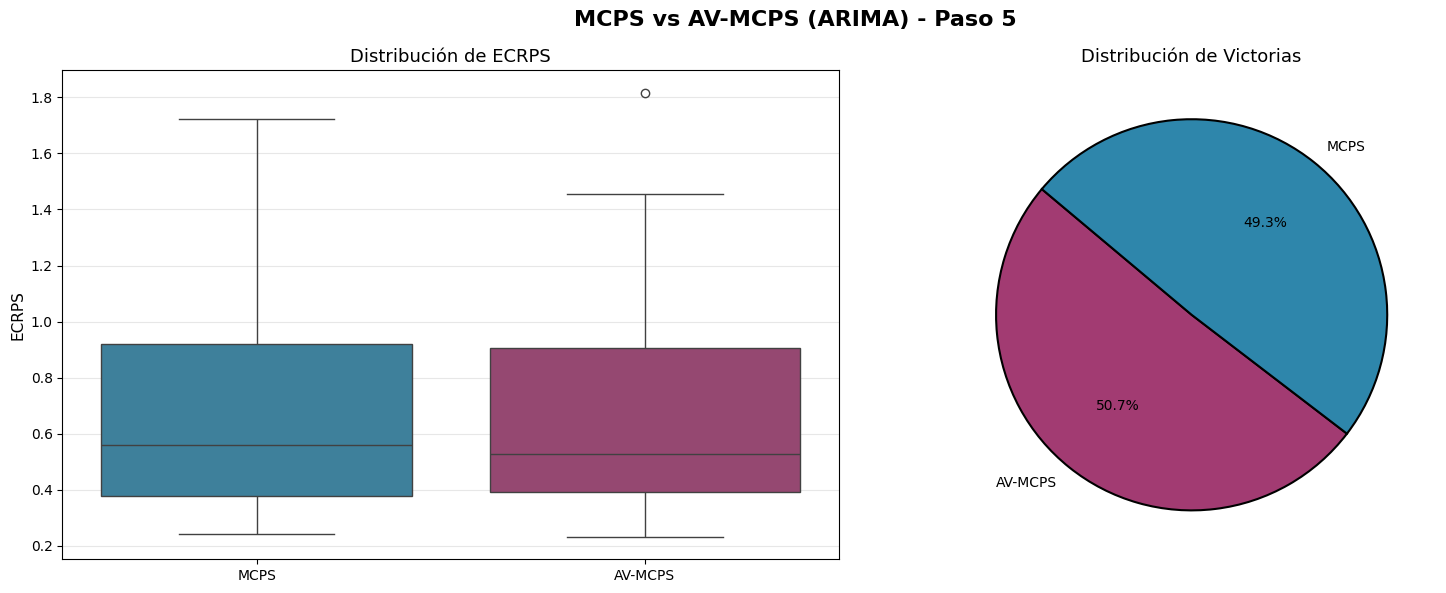

c:\Users\pleal\Documents\Unal\Tesis\Codigo\Prediccion_Probabilistica\codigo_final\final\prediccion_a_un_paso\lineal_no_estacionario_diferencial\pipeline.py:2681: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


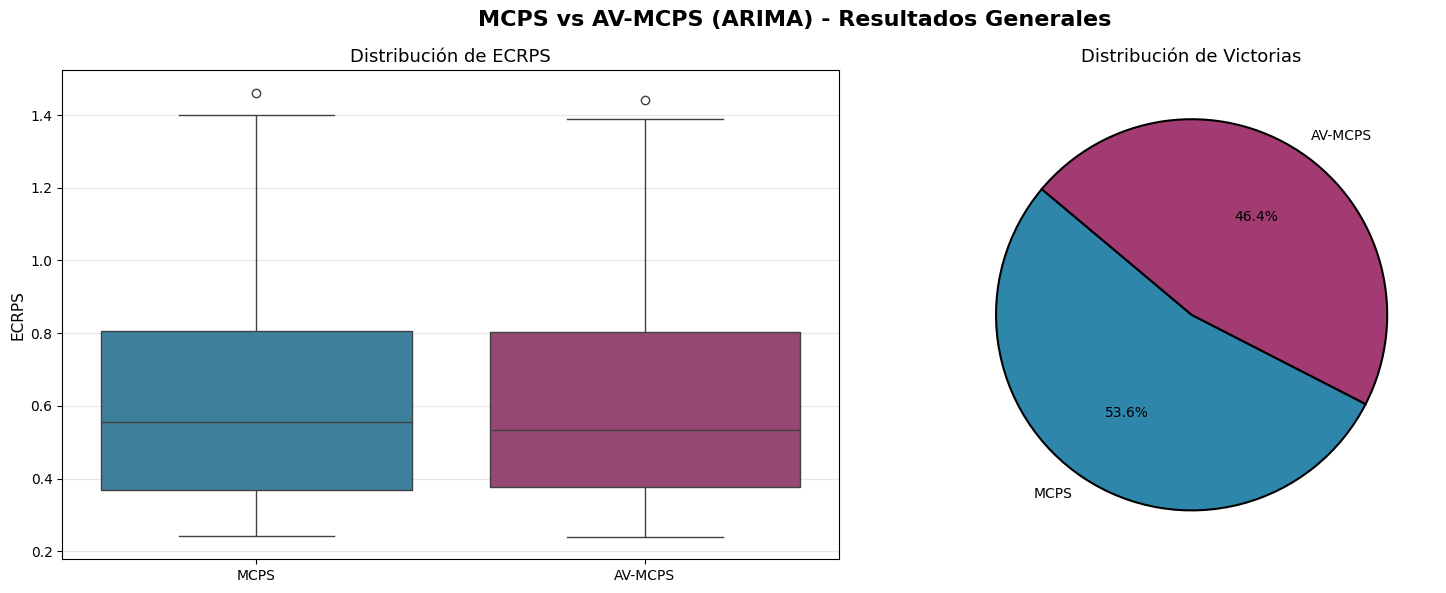

In [1]:
from pipeline import run_mcps_arima_comparison

run_mcps_arima_comparison(n_scenarios=140, plot=False, usar_diferenciacion=True)